### 자전거 공유 수요 데이터

### 데이터 불러오기 및 전처리 - 데이터 클렌징 & 가공

In [1]:
# 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_df = pd.read_csv('bike_train.csv')
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# datetime 년, 월, 일, 시간으로 분리해보기 - 타입을 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
# 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [6]:
bike_df = bike_df.drop(['casual', 'registered'], axis=1)

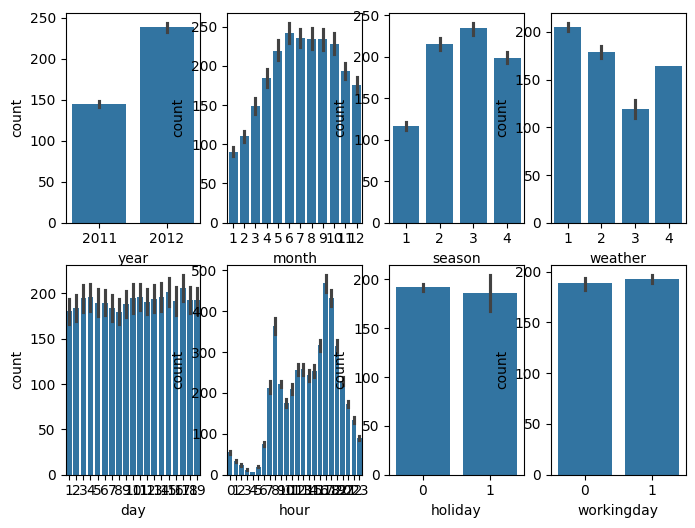

In [7]:
## 시각화
fig, axs = plt.subplots(figsize=(8,6), ncols=4, nrows=2)
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']

# 차트 그리기 - 각 위치에 원하는 차트 그리기
for i, feature in enumerate(cat_features):
    row = int(i/4) # 4개까지는 0, 5~8 까지는 1
    col = i%4 # 차례대로 0,1,2,3, 0,1,2,3

    # 그 위치에 차트그리기
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [8]:
### 데이터 분할
from sklearn.model_selection import train_test_split, GridSearchCV

X = bike_df.drop(['count', 'datetime'], axis=1)
Y = bike_df['count']

In [9]:
X_dummies = pd.get_dummies(X, columns=['season', 'weather'])
X_dummies

,holiday,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0000,2011,1,1,0,True,False,False,False,True,False,False,False
1,0,0,9.02,13.635,80,0.0000,2011,1,1,1,True,False,False,False,True,False,False,False
2,0,0,9.02,13.635,80,0.0000,2011,1,1,2,True,False,False,False,True,False,False,False
3,0,0,9.84,14.395,75,0.0000,2011,1,1,3,True,False,False,False,True,False,False,False
4,0,0,9.84,14.395,75,0.0000,2011,1,1,4,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,2012,12,19,19,False,False,False,True,True,False,False,False
10882,0,1,14.76,17.425,57,15.0013,2012,12,19,20,False,False,False,True,True,False,False,False
10883,0,1,13.94,15.910,61,15.0013,2012,12,19,21,False,False,False,True,True,False,False,False
10884,0,1,13.94,17.425,61,6.0032,2012,12,19,22,False,False,False,True,True,False,False,False


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

In [11]:
### 모델 선택
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [12]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
7560,2,0,1,3,22.14,25.760,88,19.0012,2012,5,14,9
8090,2,0,0,1,25.42,31.060,57,7.0015,2012,6,17,11
30,1,0,0,2,16.40,20.455,76,12.9980,2011,1,2,7
7290,2,0,1,2,18.86,22.725,88,0.0000,2012,5,3,3
8665,3,0,1,2,32.80,37.120,52,12.9980,2012,8,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...
4023,3,0,0,2,22.96,26.515,64,11.0014,2011,9,18,16
7259,2,0,1,1,27.06,31.060,61,11.0014,2012,5,1,20
5200,4,0,0,1,10.66,12.880,38,15.0013,2011,12,10,18
3775,3,0,1,3,25.42,27.275,94,7.0015,2011,9,8,7


In [13]:
### 모델 학습
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
### 모델 예측하기
y_pred = lr.predict(X_test)

In [15]:
### 모델 평가하기
from sklearn.metrics import *
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("rmse : ", rmse)
print("mae : ", mae)
print("mse : " , mse)
print("r2 : ", r2)

rmse :  145.43379837856742
mae :  108.86650525087578
mse :  21150.9897108178
r2 :  0.37713794089164054


In [16]:
## 여러가지 모델도 돌려보기
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델별 변수 할당
rf_reg = RandomForestRegressor()
gbm_reg =GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()

In [18]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
model = RandomForestRegressor()

# 하이퍼파라미터 공간 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# K-폴드 교차 검증 정의
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_search.best_params_)

# 테스트 데이터에 대한 RMSE 계산
y_pred = grid_search.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE: ", rmse)


NameError: name 'y' is not defined

In [ ]:
# 모델별 변수 할당
rf_reg = RandomForestRegressor()
gbm_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()

# 모델 학습 및 예측
models = [rf_reg, gbm_reg, xgb_reg, lgbm_reg]
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{name} Model:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print()

Random Forest Model:
RMSE: 41.51
MAE: 26.68
MSE: 1722.93
R-squared: 0.95

Gradient Boosting Model:
RMSE: 70.02
MAE: 47.86
MSE: 4902.50
R-squared: 0.86

XGBoost Model:
RMSE: 41.99
MAE: 27.38
MSE: 1763.10
R-squared: 0.95

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 8708, number of used features: 12
[LightGBM] [Info] Start training from score 190.736449
LightGBM Model:
RMSE: 40.37
MAE: 26.72
MSE: 1629.92
R-squared: 0.95

